In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score
from sklearn.model_selection import train_test_split as tts

#### Importing the data

In [31]:
file='../Social_Network_Ads.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n\nShape->',data.shape)
data.head()

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object 

Shape-> (400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Preprocessing

In [32]:
# No missings observed
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
# Splitting the data (& Skipping standardizing)
inputs=np.array(data.drop('Purchased',axis=1))
target=np.array(data['Purchased']).reshape(len(data),1)
x_train,x_test,y_train,y_test=tts(inputs,target,random_state=42,stratify=target,test_size=0.25)

### <span style="color: yellow;">Fitting The Model</span>

#### Decision Tree

In [34]:
# decision tree classifier
clf=DecisionTreeClassifier(ccp_alpha=0.05)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#### Model Evaluation

<Figure size 640x480 with 0 Axes>

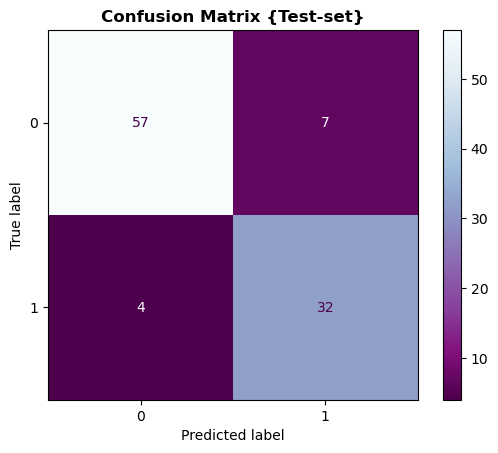

In [35]:
# Confusion matrix
sns.reset_defaults()
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='BuPu_r')
plt.title('Confusion Matrix {Test-set}',fontweight='bold')
plt.show()

In [36]:
# Classification metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.82      0.89      0.85        36

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



In [37]:
# roc score
print('ROC score:',roc_auc_score(y_test,y_pred))

ROC score: 0.8897569444444444


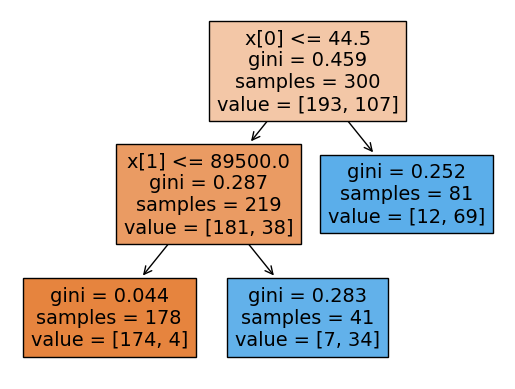

In [38]:
# Visualizing the tree
plt.figure()
plot_tree(clf,filled=True)
plt.show()

<Figure size 640x480 with 0 Axes>

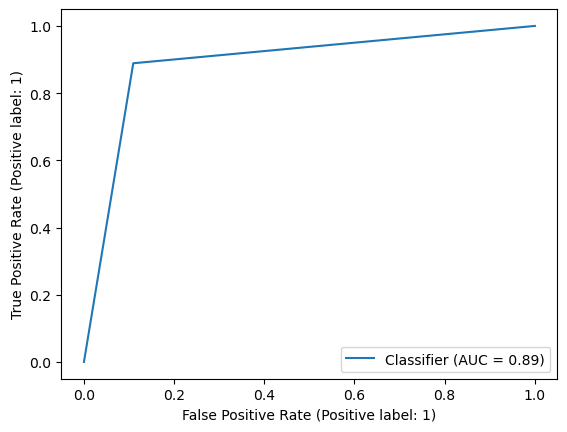

In [39]:
# Visualizing roc curve
plt.figure()
RocCurveDisplay.from_predictions(y_test,y_pred)
plt.show()